# Exploratory Data Analysis
Week 1

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "Data/"

articles = pd.DataFrame(pd.read_csv(path + "articles.csv"))
customers = pd.read_csv(path + "customers.csv")
transactions_train = pd.read_csv(path + "transactions_train.csv")
sample_submission = pd.read_csv(path + "sample_submission.csv")

## Articles

In [6]:
articles.head() # for visual purposes

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [7]:
print(f"There are {len(articles)} articles in the dataset")
print(f"{articles['article_id'].nunique()} articles have a unique article id")
missing_count = articles.isna().sum()
missing_info = pd.DataFrame({
    "Missing values":  missing_count,
    "Percentage": round((missing_count / len(articles)) * 100,2)
})
missing_info


There are 105542 articles in the dataset
105542 articles have a unique article id


,Missing values,Percentage
article_id,0,0.00
product_code,0,0.00
prod_name,0,0.00
product_type_no,0,0.00
product_type_name,0,0.00
product_group_name,0,0.00
graphical_appearance_no,0,0.00
graphical_appearance_name,0,0.00
colour_group_code,0,0.00
colour_group_name,0,0.00


**Conclusion:** The article_id column contains unique identifiers. There are no missing values for all columns except detail_desc (only a very small amount missing).

In [8]:
# It seems like the product code is the first 6 digits of the article_id. Let's check this:
articles["article_id"].astype(str).str[:6].equals(articles["product_code"].astype(str))

True

**Conclusion**: The product code is the first 6 digits of the article_id.

In [9]:
articles.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

**Conclusion:** It looks like the mapping between categories is not always consistent. For example, each product_type_no should correspond to one product_type_name but the amount of unique values differs.

In [10]:
# Investigating the issue above by checking the consistency of the mapping between categories
def are_columns_consistent(number_column, string_column):
    # group by one column and make sure there is only one unique value for the other column
    inconsistent1 = articles.groupby(number_column)[string_column].nunique()[lambda x: x > 1]
    inconsistent2 = articles.groupby(string_column)[number_column].nunique()[lambda x: x > 1]

    if not inconsistent1.empty or not inconsistent2.empty:
        # do not forget to check in both directions
        print(f"\nThe mapping between {number_column} and {string_column} is not consistent")
        for item, _ in inconsistent1.items():
            items = articles[articles[number_column] == item][string_column].unique()
            print(f"\t{number_column}: {item} has {string_column}s: {', '.join(map(str, items))}")
        for item, _ in inconsistent2.items():
            items = articles[articles[string_column] == item][number_column].unique()
            print(f"\t{string_column}: {item} has {number_column}s: {', '.join(map(str, items))}")
    else:
        print(f"\nThe mapping between {number_column} and {string_column} is consistent")

In [11]:
are_columns_consistent("product_type_no", "product_type_name")
are_columns_consistent("graphical_appearance_no", "graphical_appearance_name")
are_columns_consistent("colour_group_code", "colour_group_name")
are_columns_consistent("perceived_colour_value_id", "perceived_colour_value_name")
are_columns_consistent("perceived_colour_master_id", "perceived_colour_master_name")
are_columns_consistent("department_no", "department_name")
are_columns_consistent("index_code", "index_name")
are_columns_consistent("index_group_no", "index_group_name")
are_columns_consistent("section_no", "section_name")
are_columns_consistent("garment_group_no", "garment_group_name")


The mapping between product_type_no and product_type_name is not consistent
	product_type_name: Umbrella has product_type_nos: 532, 83

The mapping between graphical_appearance_no and graphical_appearance_name is consistent

The mapping between colour_group_code and colour_group_name is consistent

The mapping between perceived_colour_value_id and perceived_colour_value_name is consistent

The mapping between perceived_colour_master_id and perceived_colour_master_name is consistent

The mapping between department_no and department_name is not consistent
	department_name: Accessories has department_nos: 9985, 3510, 7530, 3941
	department_name: Bags has department_nos: 3209, 3944
	department_name: Belts has department_nos: 3509, 7389
	department_name: Blazer has department_nos: 5555, 5131
	department_name: Blouse has department_nos: 1510, 1515, 1522
	department_name: Dress has department_nos: 1322, 1313, 1310
	department_name: EQ & Special Collections has department_nos: 4342, 3439
	dep

In [12]:
articles.min(numeric_only=True)

article_id                    108775015
product_code                     108775
product_type_no                      -1
graphical_appearance_no              -1
colour_group_code                    -1
perceived_colour_value_id            -1
perceived_colour_master_id           -1
department_no                      1201
index_group_no                        1
section_no                            2
garment_group_no                   1001
dtype: int64

In [13]:
print("Amount of occurrences of value -1:")
print(f"\tproduct_type_no: {articles['product_type_no'].value_counts().get(-1,0)}")
print(f"\tgraphical_appearance_no: {articles['graphical_appearance_no'].value_counts().get(-1,0)}")
print(f"\tcolour_group_code: {articles['colour_group_code'].value_counts().get(-1,0)}")
print(f"\tperceived_colour_value_id: {articles['perceived_colour_value_id'].value_counts().get(-1,0)}")
print(f"\tperceived_colour_master_id: {articles['perceived_colour_master_id'].value_counts().get(-1,0)}")

Amount of occurrences of value -1:
	product_type_no: 121
	graphical_appearance_no: 52
	colour_group_code: 28
	perceived_colour_value_id: 28
	perceived_colour_master_id: 685


**Conclusion:** 5 categorical columns contain the value -1, but this number occurs a relatively small amount of times. The other columns do not contain negative numbers.

In [14]:
articles.max(numeric_only=True)

article_id                    959461001
product_code                     959461
product_type_no                     762
graphical_appearance_no         1010029
colour_group_code                    93
perceived_colour_value_id             7
perceived_colour_master_id           20
department_no                      9989
index_group_no                       26
section_no                           97
garment_group_no                   1025
dtype: int64

**Conclusion:** When features are described using both numerical and string categories, the mapping between both is not always consistent. As shown above, sometimes multiple category numbers are mapped to the same category name. 

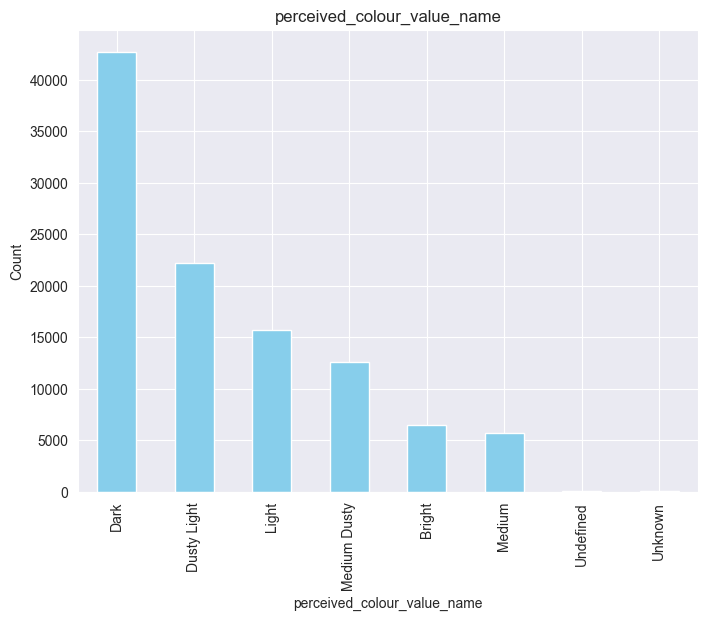

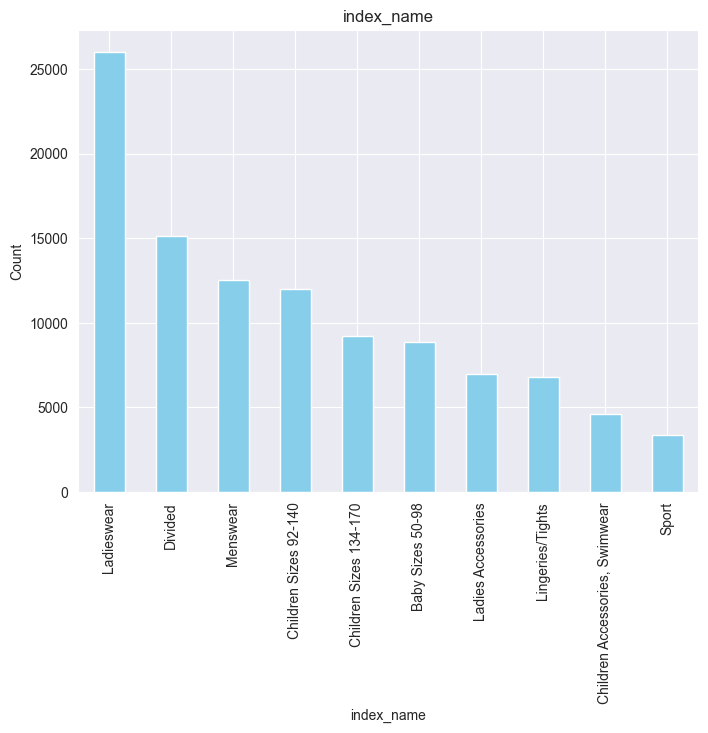

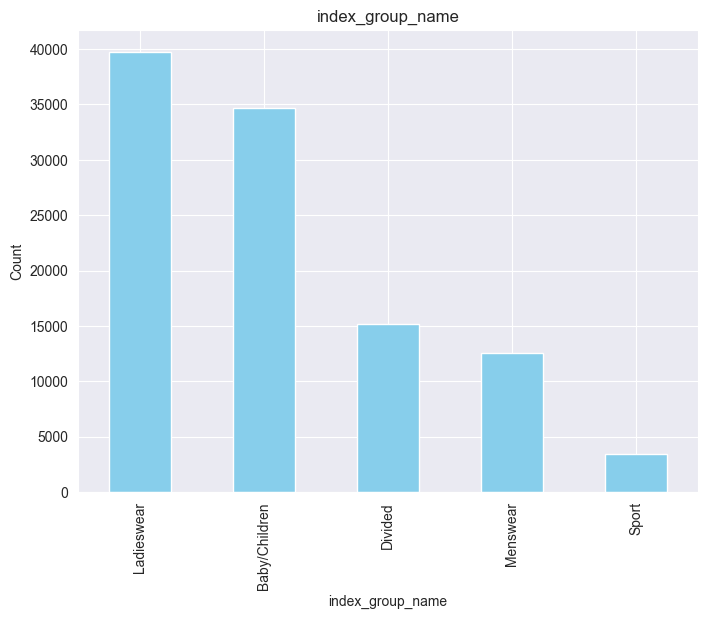

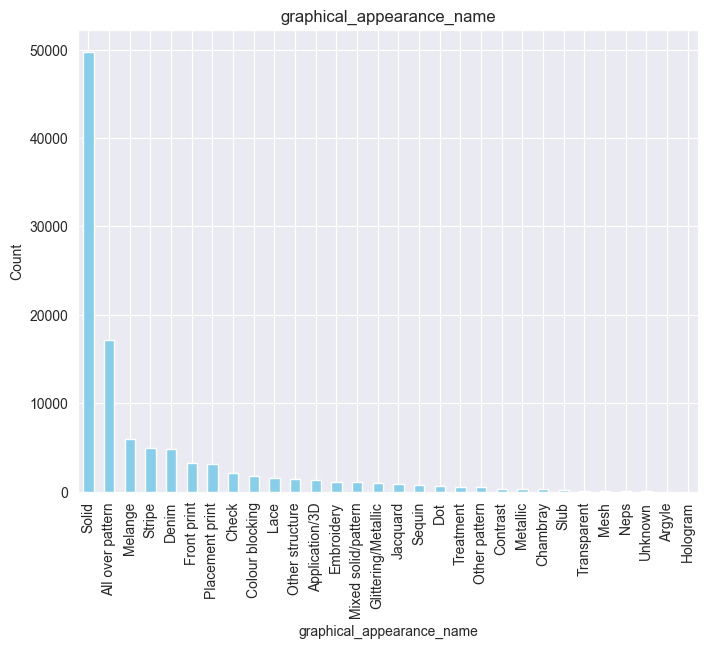

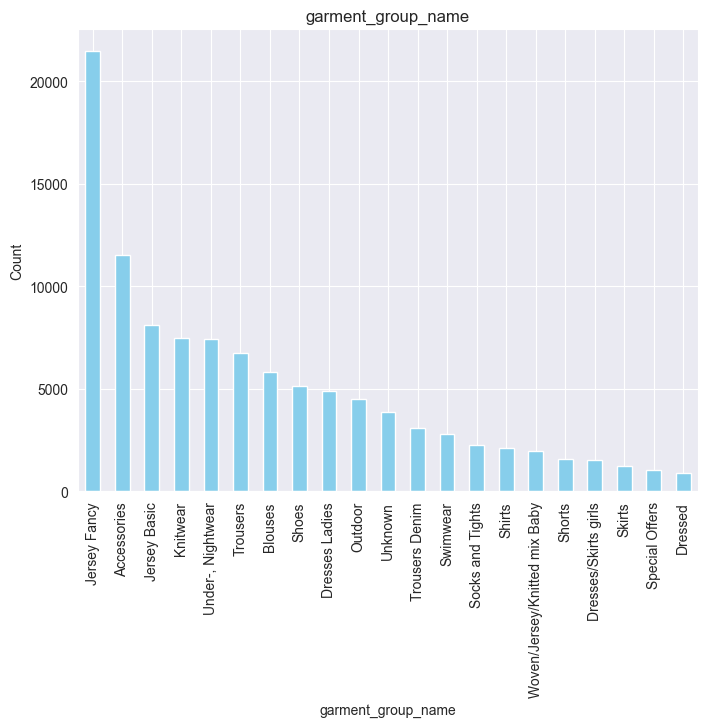

In [15]:
# investigation of nominal columns
# These are all columns with a small number of categories so let's have a look at them
columns_to_plot = ["perceived_colour_value_name", "index_name", "index_group_name", "graphical_appearance_name", "garment_group_name"]

# Function to create a histogram for a given column
# Code reused from a previous project
def plot_histogram(data, column_name):
    plt.figure(figsize=(8, 6))
    data[column_name].value_counts(dropna=False).plot(kind='bar', color='skyblue')
    plt.title(f'{column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

for column in columns_to_plot:
    plot_histogram(articles, column)

## Customers 

In [16]:
customers.head() # for visual purposes

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


*Explanation found on 'https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/discussion/307001'*
**Explanation from the host:**
- FN is if a customer get Fashion News newsletter
- Active is if the customer is active for communication

In [17]:
print(f"There are {len(customers)} customers in the dataset")
print(f"{customers['customer_id'].nunique()} customers have a unique customer id")
missing_count = customers.isna().sum()
missing_info = pd.DataFrame({
    "Missing values":  missing_count,
    "Percentage": round((missing_count / len(customers)) * 100,2)
})
missing_info

There are 1371980 customers in the dataset
1371980 customers have a unique customer id


,Missing values,Percentage
customer_id,0,0.00
FN,895050,65.24
Active,907576,66.15
club_member_status,6062,0.44
fashion_news_frequency,16011,1.17
age,15861,1.16
postal_code,0,0.00


**Conclusion:** The customer_id column contains unique identifiers. The customer dataset has many missing values in different columns. The FN column and Active column have a relatively high amount of missing values

The customer_id column contains 64 hexadecimal characters: True
The postal_code column contains 64 hexadecimal characters: True


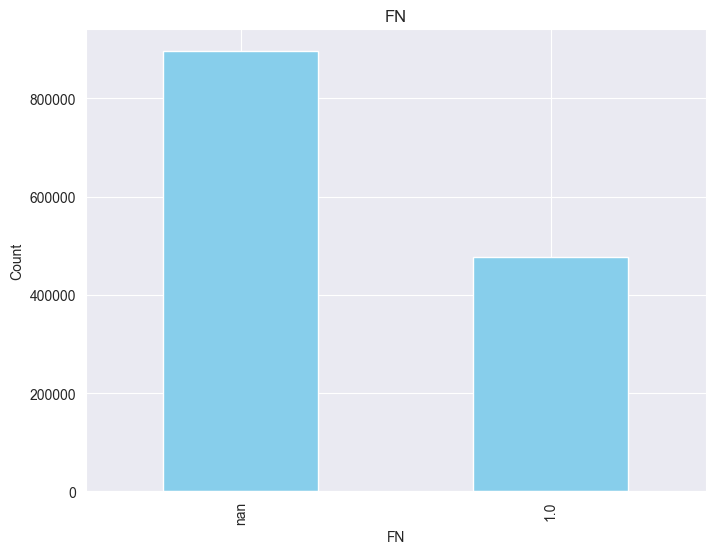

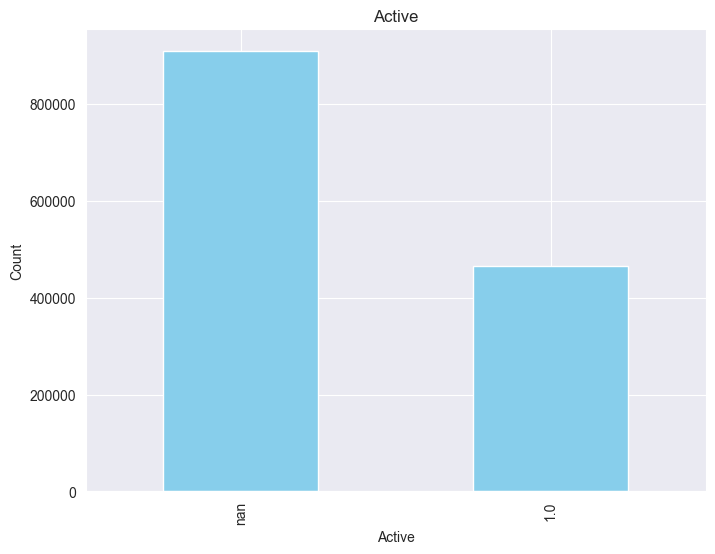

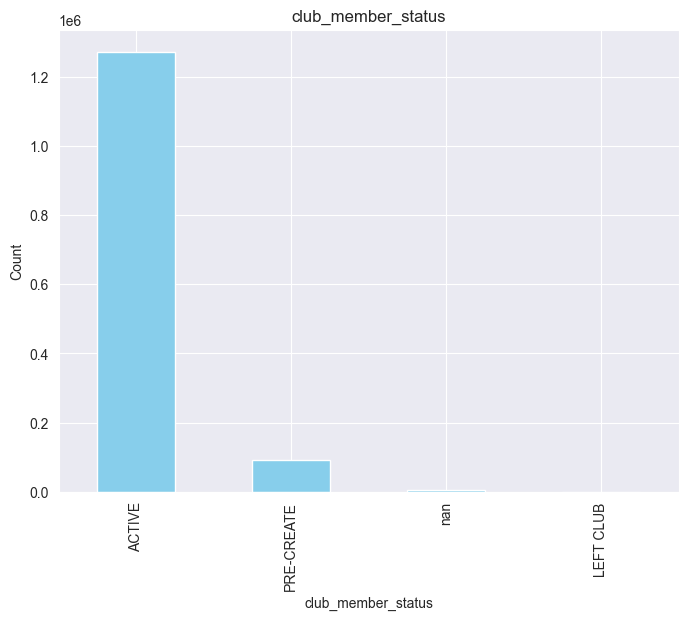

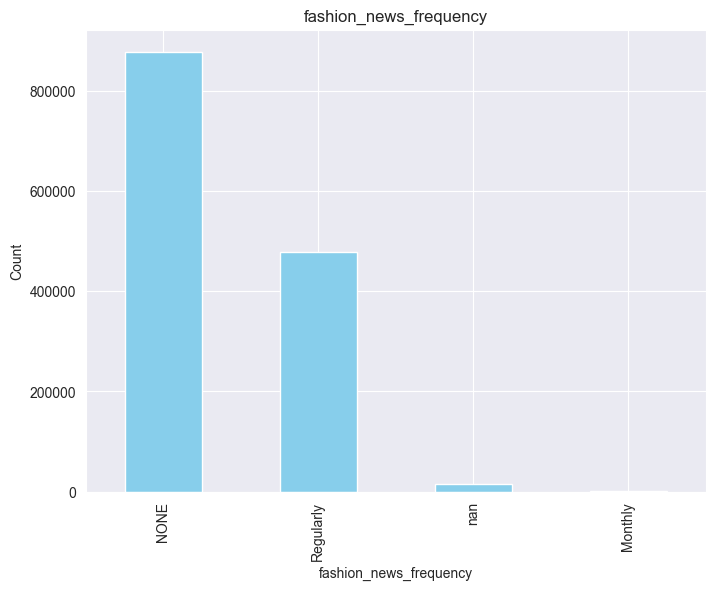

In [18]:
# investigation of nominal columns

# Check the consistency of the format of the customer_id column and the postal_code column
id = customers["customer_id"].str.fullmatch("^[a-f0-9]{64}$").all()
zip = customers["postal_code"].str.fullmatch("^[a-f0-9]{64}$").all()
print("The customer_id column contains 64 hexadecimal characters:", id)
print("The postal_code column contains 64 hexadecimal characters:", zip)

# These are all columns with a small number of categories so let's have a look at them
columns_to_plot = ["FN", "Active", "club_member_status", "fashion_news_frequency"]

# Function to create a histogram for a given column
# Code reused from a previous project
def plot_histogram(data, column_name):
    plt.figure(figsize=(8, 6))
    data[column_name].value_counts(dropna=False).plot(kind='bar', color='skyblue')
    plt.title(f'{column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

for column in columns_to_plot:
    plot_histogram(customers, column)

**Conclusion:** The customer_id column and the postal_code column have consistent entries of 64 hexadecimal characters.

In [19]:
customers["age"].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

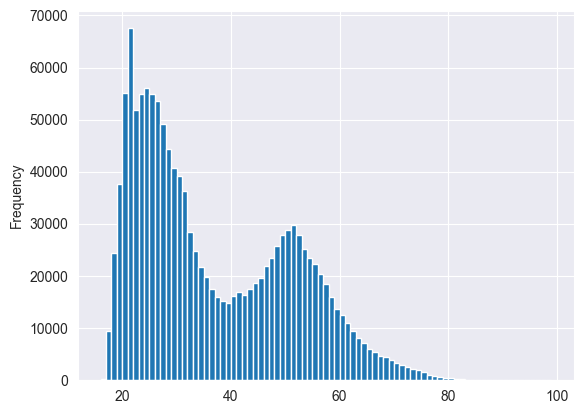

In [20]:
age_rounded = customers["age"].round(0).astype("Int64")
min_age = age_rounded.min()
max_age = age_rounded.max()
age_rounded.plot.hist(bins= max_age - min_age, range=(min_age, max_age))

**Conclusion:** The minimal age (16), average age (36) and maximal age (99) look realistic. The histogram has a realistic shape. It isn't necessary to delete the missing 1.16% of values, we can replace it by the median

## Transactions

In [21]:
transactions_train.head() # for visual purposes

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [23]:
transactions_train.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [55]:
set_transactions = set(transactions_train["customer_id"])
set_customers = set(customers["customer_id"])

# No customers should be in the transactions dataset that are not in the customers dataset
correct = len(set_transactions - set_customers) == 0

print(f"Every customer in the transactions dataset is also in the customers dataset: {correct}")

Every customer in the transactions dataset is also in the customers dataset: True


In [57]:
set_transactions = set(transactions_train["article_id"])
set_articles = set(articles["article_id"])

correct = len(set_transactions -  set_articles) == 0
print(f"Every article in the transactions dataset is also in the articles dataset: {correct}")

Every article in the transactions dataset is also in the articles dataset: True


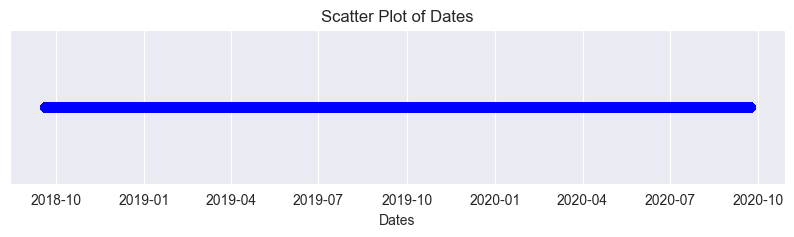

In [25]:
temp = pd.to_datetime(transactions_train["t_dat"])
# Create scatter plot
plt.figure(figsize=(10, 2))  # Change the size as needed
plt.scatter(temp, [1]*len(temp), c='blue')
plt.yticks([])  # Hide the y-axis
plt.xlabel('Dates')
plt.title('Scatter Plot of Dates')

plt.show()

In [58]:
transactions_train["price"].describe()

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

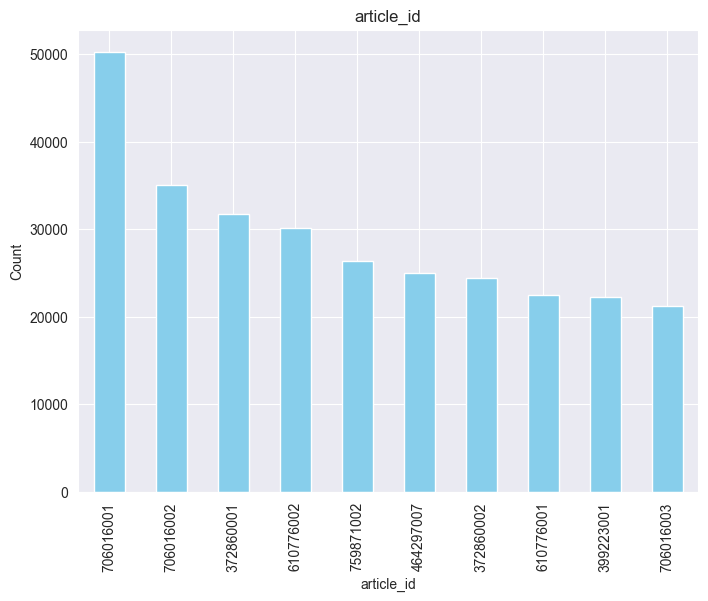

In [67]:
# Function to create a histogram for a given column
# Code reused from a previous project
plt.figure(figsize=(8, 6))
temp = transactions_train["article_id"].value_counts(dropna=False).sort_values(ascending=False).head(10)
temp.plot(kind='bar', color='skyblue')

plt.title(f'{"article_id"}')
plt.xlabel("article_id")
plt.ylabel('Count')
plt.show()



In [68]:
articles[articles["article_id"] == 706016001]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
53892,706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...


## Submission example

In [3]:
sample_submission.head() # for visual purposes

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [4]:
sample_submission.isna().sum()

customer_id    0
prediction     0
dtype: int64

In [28]:
unique_customers = customers['customer_id'].unique()
unique_sample_submission = sample_submission['customer_id'].unique()
print(f"{len(unique_customers)} in the customers dataset and {len(unique_sample_submission)} in the sample submission")
print(f"One to one mapping: {len(unique_customers) == len(unique_sample_submission)}")

1371980 in the customers dataset and 1371980 in the sample submission
One to one mapping: True


In [42]:
# prediction represents a list of items:
unique_pred = sample_submission['prediction'].unique()
print(unique_pred)

['0706016001 0706016002 0372860001 0610776002 0759871002 0464297007 0372860002 0610776001 0399223001 0706016003 0720125001 0156231001']


**Conclusion:** The prediction is the same for every customer.

In [41]:
unique_pred = sample_submission['prediction'].unique()[0]
correct = True
for group in unique_pred.split(" "):
    if int(group) not in articles["article_id"].values:
        correct = False
        break
print(f"Prediction contains only valid articles: {correct}")

Prediction contains only valid articles: True


**Conclusion:** The prediction contains only valid articles.